In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [4]:
insurance_data = pd.read_csv('train.csv')

# Data Exploration

**Looking at the first 10 records of the dataset**

In [5]:
insurance_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [24]:
insurance_data['Response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

**The code below shows if there are any null values in the dataset. Based on each column attribute, we do not see any null values in the dataset**

In [ ]:
insurance_data

In [12]:
insurance_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Here we can use .info() to see more about the data: how many entries, non-null count (like above), and the data type**

In [13]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Now we will look at the summarization of the descriptive statistics of the dataset**

In [14]:
insurance_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Frequencies of Categorical Variables**

**Gender Frequencies**

In [15]:
gender_freq_tab = insurance_data['Gender'].value_counts()
gender_freq_tab

Male      206089
Female    175020
Name: Gender, dtype: int64

In [16]:
gen_total = insurance_data['Gender'].value_counts().sum()
insurance_data['Gender'].value_counts()/gen_total

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

**Vehicle_Age Frequencies**

In [17]:
veh_freq_tab = insurance_data['Vehicle_Age'].value_counts()
veh_freq_tab

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [18]:
veh_total = insurance_data['Vehicle_Age'].value_counts().sum()
insurance_data['Vehicle_Age'].value_counts()/veh_total

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

**Vehicle_Damage Frequencies**

In [19]:
damage_freq_tab = insurance_data['Vehicle_Damage'].value_counts()
damage_freq_tab

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [20]:
damage_total = insurance_data['Vehicle_Damage'].value_counts().sum()
insurance_data['Vehicle_Damage'].value_counts()/damage_total

Yes    0.504877
No     0.495123
Name: Vehicle_Damage, dtype: float64

**Plots of Various Distributions, Scatter Matrix, and Scatter Plots**

**Figure 1: The code below produces a scatter matrix of all the numerical variables to learn about their individuality and relationships amongst them. According the scatter plots below, there appears to be almost no correlation between any set of variables. We also notice that none of the variables show a normal distribution.**

**Figure 1:**

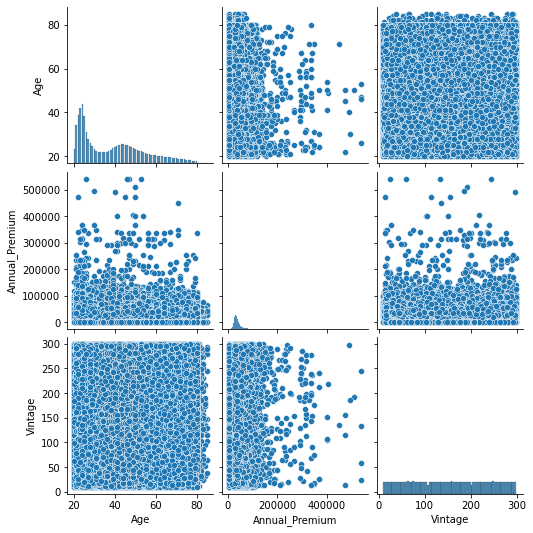

In [21]:
var = ['Age', 'Annual_Premium', 'Vintage']
sns.pairplot(insurance_data[var])

**Figure 2: Distribution of Age**

Text(0.5, 1.0, 'Age')

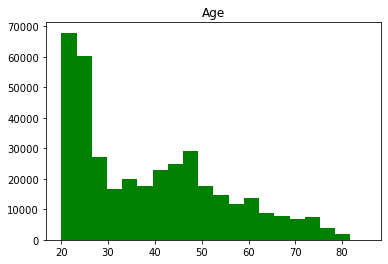

In [22]:
plt.hist(insurance_data['Age'], bins = 20, color = 'g')
plt.title('Age')

**Figure 3: Distribution of Annual Premium**

Text(0.5, 1.0, 'Annual Premium')

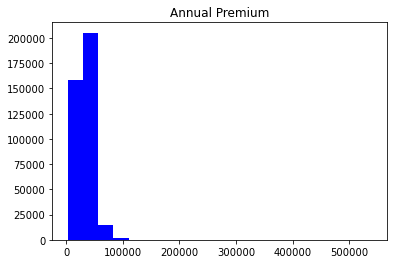

In [23]:
plt.hist(insurance_data['Annual_Premium'], bins = 20, color = 'b')
plt.title('Annual Premium')

In [90]:
ann_prem_gt_150k = insurance_data['Annual_Premium'] > 150000
insurance_data[ann_prem_gt_150k]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
3243,265540,Female,50,1,7,0,1-2 Year,Yes,399010,156,104,0
7272,190155,Male,47,1,28,0,1-2 Year,Yes,540165,42,24,0
7991,69545,Male,37,1,28,0,1-2 Year,Yes,167393,122,70,1
8970,39480,Female,36,1,28,0,1-2 Year,Yes,214455,26,249,0


**Figure 4: Distribution of Vintage**

Text(0.5, 1.0, 'Vintage')

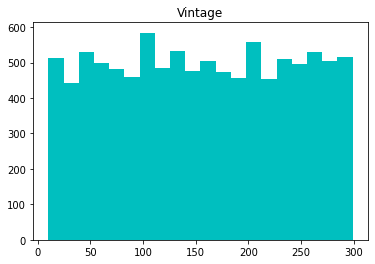

In [91]:
plt.hist(insurance_data['Vintage'], bins = 20, color = 'c')
plt.title('Vintage')

**In Figure 5, you can see that we logged the data since Annual_Premium was severely skewed to the right. After logging the Annual_Premium and Age, we recognize that there is no apparent relationship or correlation among the variables in reference to the Response variable. (1 = yellow, 0 = purple)**

**Figure 5:**

Text(0, 0.5, 'Age')

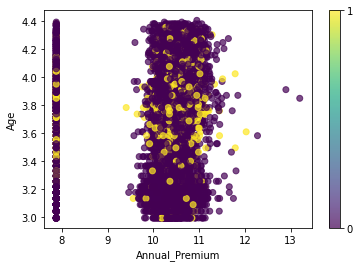

In [92]:
x = np.log(insurance_data['Annual_Premium'])
y = np.log(insurance_data['Age'])

cat = insurance_data['Response']

plt.scatter(x, y, c = cat, alpha = 0.7)

colorbar = plt.colorbar(ticks=[0,1])

plt.xlabel('Annual_Premium')
plt.ylabel('Age')

**In Figure 6, you can see that we logged the data once again since Annual_Premium was severely skewed to the right. After logging the Annual_Premium and Vintage, we recognize that there is no apparent relationship or correlation among the variables in reference to the Response variable.**

**Figure 6:**

Text(0, 0.5, 'Annual_Premium')

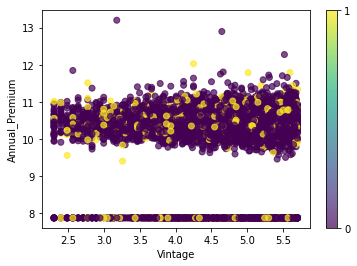

In [103]:
x = np.log(insurance_data['Vintage'])
y = np.log(insurance_data['Annual_Premium'])

cat = insurance_data['Response']

plt.scatter(x, y, c = cat, alpha = 0.7)

colorbar = plt.colorbar(ticks=[0,1])

plt.xlabel('Vintage')
plt.ylabel('Annual_Premium')

**In Figure 7, comparing both Vintage and Age, we still see no correlation or relationship between the two variables.**

**Figure 7:**

Text(0, 0.5, 'Age')

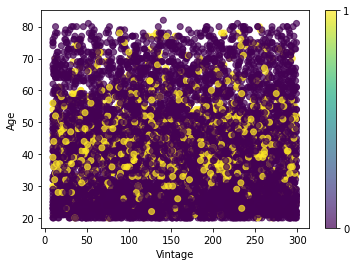

In [105]:
x = insurance_data['Vintage']
y = insurance_data['Age']

cat = insurance_data['Response']

plt.scatter(x, y, c = cat, alpha = 0.7)

colorbar = plt.colorbar(ticks=[0,1])

plt.xlabel('Vintage')
plt.ylabel('Age')

**In Figure 8, we are using boxplots to see the Annual_Premium distribution of Previously_Insured (Yes = 1, No = 0) with Response (Yes = 1, No = 0). Also note we had to log the data because of Annual_Premium skewness.**

**Figure 8:**

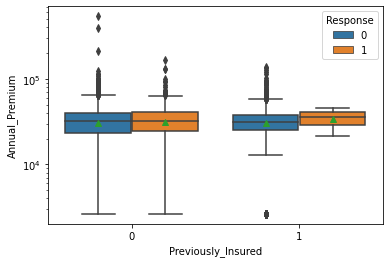

In [94]:
plot = sns.boxplot(data = insurance_data, 
            x = 'Previously_Insured', 
            y = 'Annual_Premium',
            hue = 'Response',
            showmeans = True)

plot.set_yscale("log")

**In Figure 9, comparing the Age distribution for Previously_Insured (Yes = 1, No = 0) with Response (Yes = 1, No = 0). We notice that for those policyholders that were previously insured and responsed 'Yes', we see a large amount of people's age ranges in the mid-to-upper 20s. For the policyholders who were not previously insurance but responded 'Yes', the age range is higher and wider; between upper 30s to 50 years old.**

**Figure 9:**

<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

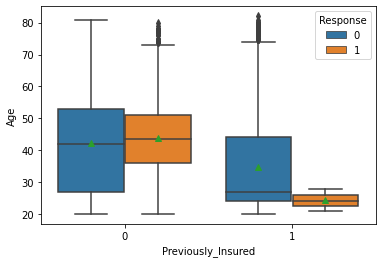

In [95]:
sns.boxplot(data = insurance_data, 
            x = 'Previously_Insured', 
            y = 'Age',
            hue = 'Response',
            showmeans = True)

**Figure 10 shows Age distribution for those who have a driver license and for those who do not (Yes = 1, No = 1), with Response (Yes = 1, No = 0). Those individuals that have a drivers license and responded 'Yes' show an age range from upper 40s to 50 years old. While the those who responded 'Yes' but do not have a drivers license are much higher in age.**

**Figure 10:**

<AxesSubplot:xlabel='Driving_License', ylabel='Age'>

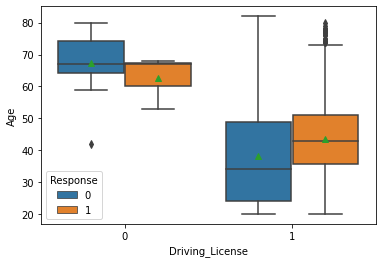

In [96]:
sns.boxplot(data = insurance_data, 
            x = 'Driving_License', 
            y = 'Age',
            hue = 'Response',
            showmeans = True)

**We compared in Figure 11 the Age distribution for those who had different vehicle ages (< 1 Years, 1-2 Years, > 2 Years) with Response (Yes = 1, No = 0). We see overall that those individuals that are typically younger (minus the outliers) have an vehicle age range of < 1 years old. A large amount of people from upper 30s to around 60 had vehicle ages of 1-2 Years; while older individuals between 50 and 70 had vehicle ages > 2 years old.**

**Figure 11:**

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

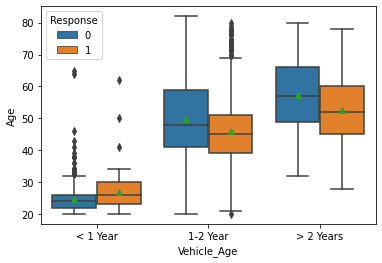

In [106]:
sns.boxplot(data = insurance_data, 
            x = 'Vehicle_Age', 
            y = 'Age',
            hue = 'Response',
            showmeans = True)

# Feature Engineering

**There are a few categorical features that need to be changed into numerical in order for one of our models to run properly. The KNN model only uses numerical, so we will convert the following variables appropriately.**

**Gender**

In [107]:
insurance_data['Gender'].value_counts()

Male      5363
Female    4637
Name: Gender, dtype: int64

In [108]:
insurance_data.Gender = insurance_data.Gender.map(dict(Male=1, Female=0))

**Vehicle_Age**

In [109]:
insurance_data['Vehicle_Age'].value_counts()

1-2 Year     5295
< 1 Year     4294
> 2 Years     411
Name: Vehicle_Age, dtype: int64

In [110]:
insurance_data['Vehicle_Age'] = insurance_data['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

**Vehicle_Damage**

In [111]:
insurance_data['Vehicle_Damage'].value_counts()

No     5015
Yes    4985
Name: Vehicle_Damage, dtype: int64

In [112]:
insurance_data.Vehicle_Damage = insurance_data.Vehicle_Damage.map(dict(No=1, Yes=0))

**id: we will drop this variable**

In [113]:
insurance_data = insurance_data.drop(['id'], axis = 1)

**Dataset after the feature transformation**

In [114]:
insurance_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,24,1,8,1,0,1,38744,152,267,0
1,0,41,1,28,0,1,0,24929,124,156,0
2,0,72,1,8,0,1,0,113486,26,70,0
3,1,43,1,47,0,2,0,2630,156,209,0
4,1,25,1,41,1,0,0,62383,160,20,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,25,1,28,1,0,1,35887,152,26,0
9996,0,25,1,46,1,0,1,27879,152,173,0
9997,0,36,1,28,0,1,0,27273,26,51,1
9998,1,46,1,28,0,1,0,42959,124,162,0


# Splitting the Data

In [115]:
from sklearn.model_selection import train_test_split


X = insurance_data.drop('Response', axis = 1)
y = insurance_data['Response']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [116]:
y_train

7389    0
9275    0
2995    0
5316    1
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    0
Name: Response, Length: 8000, dtype: int64

# Checking if dataset is imbalanced

In [117]:
np.sum(y_train)/y_train.shape[0] 

0.120375

In [118]:
np.sum(y)/y.shape[0]

0.1215

In [119]:
np.sum(y)

1215

# Models

# K-Nearest Neighbor

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train Score', knn.score(X_train, y_train))
print('Test Score', knn.score(X_test, y_test))


Train Score 0.886
Test Score 0.8575


In [125]:
from sklearn.model_selection import GridSearchCV

k = list(range(1, 15))
param_knn = dict(n_neighbors=k)

knn = KNeighborsClassifier(k)

grid_knn = GridSearchCV(knn, param_knn, cv = 5)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13,
                                                         14]),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [126]:
grid_knn.best_params_

{'n_neighbors': 12}

In [127]:
grid_knn.best_score_ # Best validation score

0.8795

In [128]:
grid_knn.score(X_test, y_test) # Test score

0.873

# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Train score:', logreg.score(X_train, y_train))
print('Test score:', logreg.score(X_test, y_test))

Train score: 0.879625
Test score: 0.874


In [130]:
from sklearn.model_selection import GridSearchCV

param_log = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg = LogisticRegression()

grid_log_reg = GridSearchCV(log_reg, param_log, cv = 5)

grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [131]:
grid_log_reg.best_params_

{'C': 100}

In [132]:
grid_log_reg.best_score_ # Best validation score

0.8797499999999999

In [133]:
grid_log_reg.score(X_test, y_test) # Test score

0.874

In [134]:
y_pred = grid_log_reg.predict(X_test)

TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

TP, FP, FN, TN

(0, 0, 252, 1748)

In [135]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

0.874

In [136]:
precision = TP/(TP + FP)
precision

nan

In [137]:
recall = TP/(TP + FN)
recall

0.0

**Changing the threshold**

In [168]:
prob_predicted = grid_log_reg.predict_proba(X_test)


y_pred_05 = np.where(prob_predicted[:,1] > 0.05, 1, 0)
y_pred_05

array([1, 1, 1, ..., 1, 1, 1])

In [169]:
TP = np.sum((y_test == 1) & (y_pred_05 == 1)) 
FP = np.sum((y_test == 0) & (y_pred_05 == 1)) 
FN = np.sum((y_test == 1) & (y_pred_05 == 0)) 
TN = np.sum((y_test == 0) & (y_pred_05 == 0))

TP, FP, FN, TN

(250, 1663, 2, 85)

In [170]:
precision = TP/(TP + FP)
precision

0.13068478829064298

In [171]:
recall = TP/(TP + FN)
recall

0.9920634920634921

# Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dtree.fit(X_train, y_train)

print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

1.0
0.824


In [143]:
dtree.feature_importances_

array([0.02202432, 0.14011753, 0.        , 0.10230787, 0.21708511,
       0.01579135, 0.02710539, 0.20016911, 0.05625237, 0.21914694])

In [144]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

<BarContainer object of 10 artists>

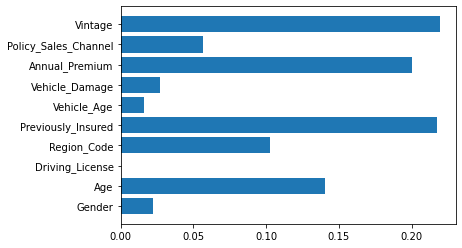

In [145]:
plt.barh(X.columns, dtree.feature_importances_)

In [146]:
from sklearn.model_selection import GridSearchCV


opt_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


DT_params = {'max_depth': range(1,10), 'min_samples_split': range(2,11), 'max_leaf_nodes': range(2,11)}



grid_tree = GridSearchCV(opt_tree, DT_params)



grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [147]:
grid_tree.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

In [148]:
grid_tree.best_score_ # Best validation score

0.8796250000000001

In [149]:
grid_tree.score(X_test, y_test) # test score

0.874